# EDA (Exploratory Data Analysis) of the dataset

In this notebook we explore the Abalone dataset to better understand the features and subsequently build a model.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

# Setting visualization style
sns.set(style='whitegrid')


# Data

In [2]:
# Load the Abalone dataset
file_path = '../data/abalone.csv'
df = pd.read_csv(file_path)

# Display first few rows of the dataset
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [3]:
# Basic statistics of the dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
# Check for missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

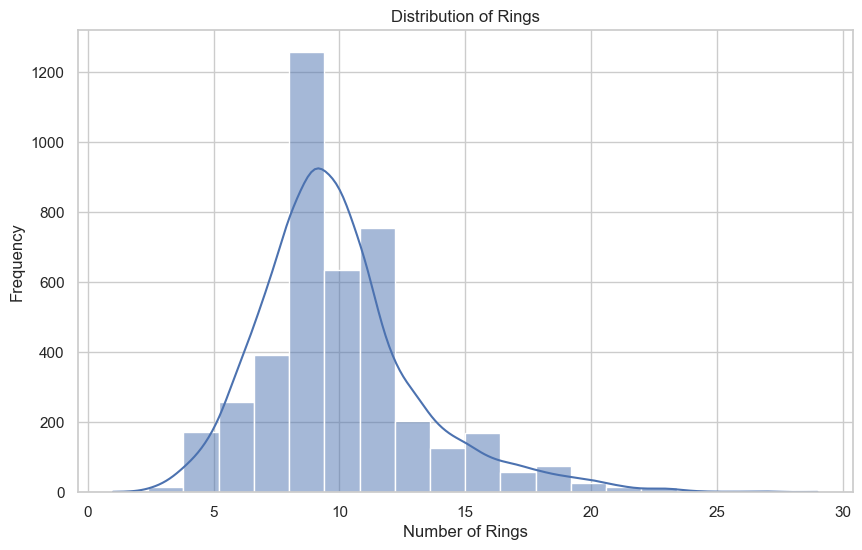

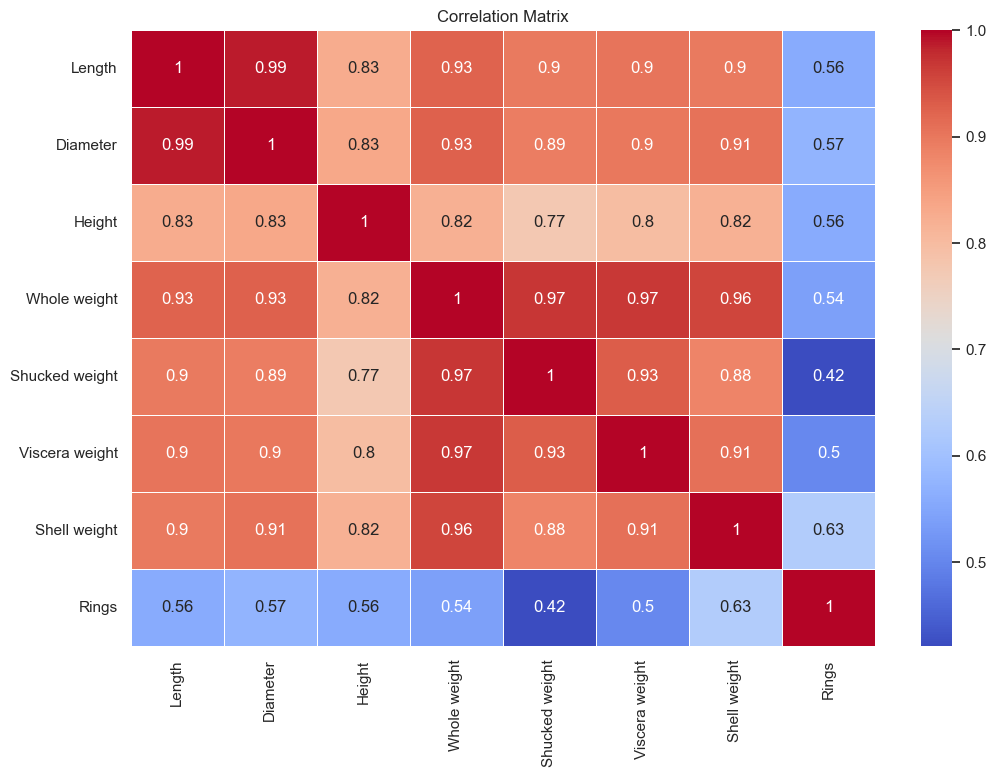

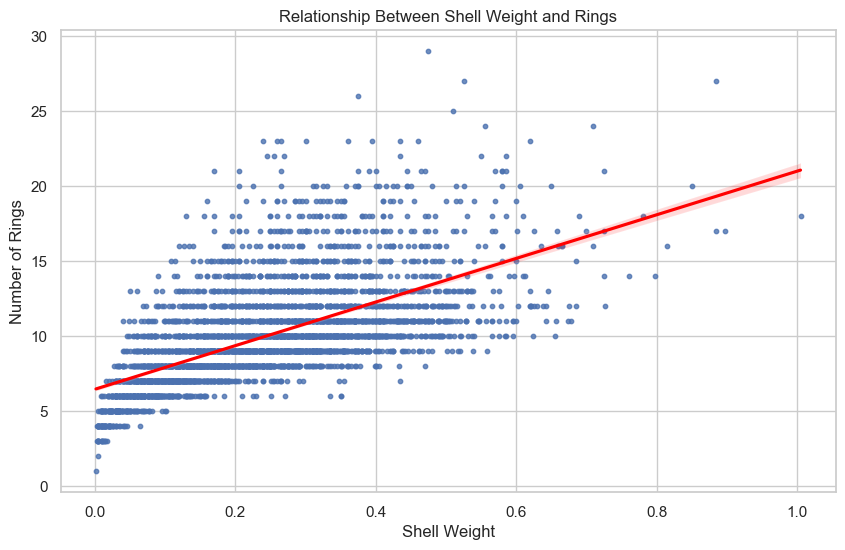

In [5]:
# Visualize the distribution of the 'Rings' variable (target)
plt.figure(figsize=(10, 6))
sns.histplot(df['Rings'], bins=20, kde=True)
plt.title('Distribution of Rings')
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix to check relationships between numeric variables
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot of 'Shell weight' vs. 'Rings' with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Shell weight', y='Rings', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relationship Between Shell Weight and Rings')
plt.xlabel('Shell Weight')
plt.ylabel('Number of Rings')
plt.show()


# Conclusion

- Rings Distribution: The "Rings" variable is right-skewed which indicates that most abalones are younger, with a peak around 8-10 rings. Older abalones are less frequent.

- Correlation Matrix: "Shell weight" has the strongest correlation with "Rings" (0.63) which suggests it may be a key predictor of age. Other features like "Length," "Diameter," and "Whole weight" show moderate correlations (~0.54-0.57), while "Shucked weight" is less relevant (0.42).

- Scatter plot: shows a positive relationship between "Shell weight" and "Rings," indicating that heavier shells generally correspond to older abalones. The upward trend confirms "Shell weight" as a significant predictor of age, though some variability suggests that other factors also play a role.